In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Taylor expansion

You can expand any continuous function as a polynomials

$$
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_{0})}{n!} (x_{0} - x)^{n}
$$

Here, $f^{(n)}$ is the $n$-th derivative and $x_{0}$ is the argument around which we expand the function

## Example: exponential function

$$f(x) = f'(x) = f''(x) = \cdots = f^{(n)}(x) = \exp{(x)}$$

In [2]:
def expTaylor(x, x0, nmax):
    # x: argument
    # x0: argument at which the derivative will be calculated
    # nmax: n at which the series will terminate
    
    t = 0
    for n in range(nmax+1):
        t = t + np.exp(x0) * (x-x0)**n / np.math.factorial(n)
    return t

In [3]:
expTaylor(1, 0, 10)

2.7182818011463845

In [4]:
np.exp(1)

2.718281828459045

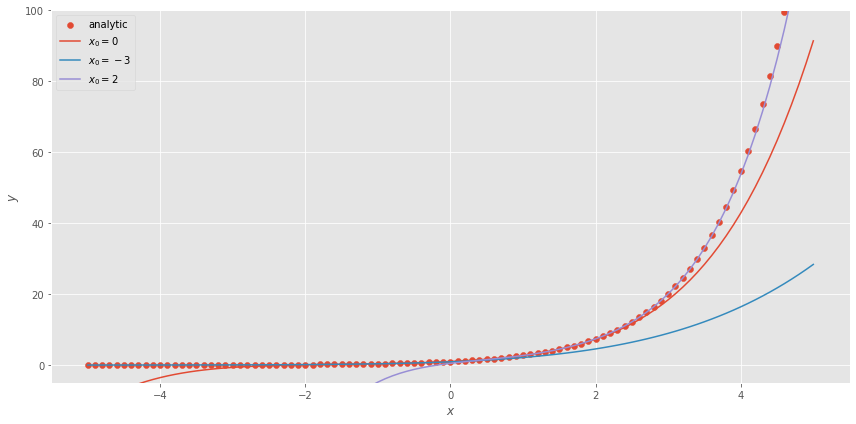

In [5]:
x_list = np.linspace(-5,5,101)

plt.figure(figsize=(12,6))
plt.scatter(x_list, np.exp(x_list), label='analytic');
nmax=5
plt.plot(x_list, expTaylor(x_list, 0, nmax), label='$x_{0} = 0$')
plt.plot(x_list, expTaylor(x_list, -3, nmax), label='$x_{0} = -3$')
plt.plot(x_list, expTaylor(x_list, 2, nmax), label='$x_{0} = 2$')
plt.xlabel('$x$');
plt.ylabel('$y$');
plt.ylim([-5, 100]);
plt.tight_layout();
plt.legend();

## Example: sin function at $x_{0} = 0$

\\( f(0) = f''(0) = f^{(4)}(0) = \dots = 0 \\)

\\( f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 \\)

\\( f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 \\)

\\( \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}\\)

In [6]:
def sinTaylor(x, nmax):
    # x: argument
    # nmax: n at which the series will terminate
    
    t = 0
    for n in range(nmax+1):
        t = t + (-1)**n * x**(2*n + 1) / np.math.factorial(2*n + 1)
    return t

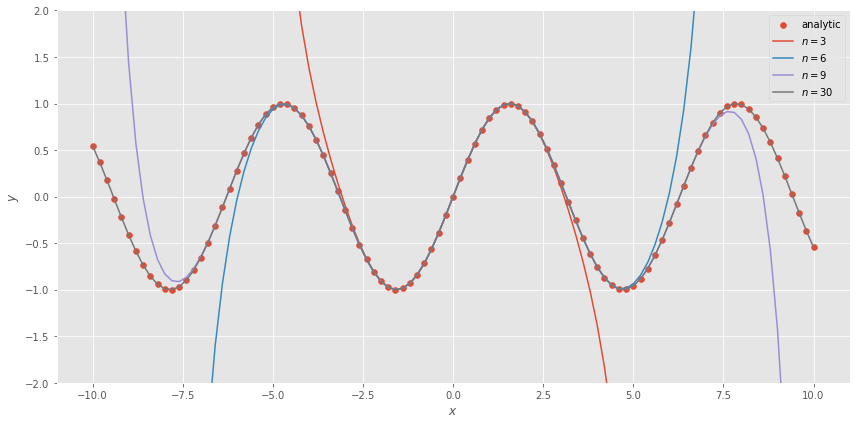

In [7]:
x_list = np.linspace(-10,10,101)

plt.figure(figsize=(12,6))

plt.scatter(x_list, np.sin(x_list), label='analytic');

plt.plot(x_list, sinTaylor(x_list, 3), label='$n = 3$')
plt.plot(x_list, sinTaylor(x_list, 6), label='$n = 6$')
plt.plot(x_list, sinTaylor(x_list, 9), label='$n = 9$')
plt.plot(x_list, sinTaylor(x_list, 30), label='$n = 30$')

plt.xlabel('$x$');
plt.ylabel('$y$');
plt.ylim([-2, 2]);
plt.tight_layout();
plt.legend();

In [8]:
np.sin(10.5) - sinTaylor(10.5, 50)

-2.844391389089651e-13

## Implemention of more general function 

Derivative:

$$
f'(x) = \lim_{h\to 0} \frac{f(x + h) - f(x)}{h}
$$

In [23]:
def derivative(f, x, h):
    """
    f: function
    x: argument of f
    h: stepsize
    """
    return (f(x + h) - f(x)) / h

In [24]:
def func(x):
    return 2*np.sin(x)**2 + x

In [25]:
x0 = 10.5
func(x0)

12.04772926022427

In [27]:
h = 0.1
derivative(func, x0, h)

2.5529969724111723

Higher derivatives: 

\\( f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)\\)

In [41]:
def nDerivative(f, x, h, n):
    """
    f: function
    x: argument of f
    h: stepsize
    n: nth derivative
    """
    t = 0
    for k in range(n+1):
        t = t + (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h)
    return t / h**n

In [42]:
nDerivative(func, x0, h, 0) # f(x = x0)

12.04772926022427

In [43]:
nDerivative(func, x0, h, 1) # f'(x = x0)

2.5529969724111723

In [44]:
nDerivative(func, x0, h, 2) # f''(x = x0)

-2.802754599797907

In [45]:
def taylor(f, x, x0, nmax, h):
    """
    f: function
    x: argument
    x0: argument at which the derivative will be calculated
    nmax: n at which the series will terminate
    h: stepsize
    """
    t = 0
    for n in range(nmax+1):
        t = t + nDerivative(f, x0, h, n) * (x-x0)**n / np.math.factorial(n)
    return t

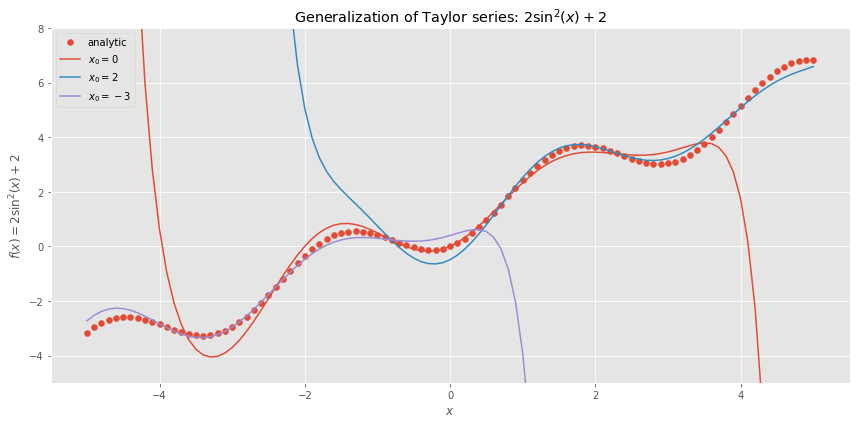

In [59]:
nmax = 15
h = 0.1

x_list = np.linspace(-5,5,101)

plt.figure(figsize=(12,6))

plt.scatter(x_list, func(x_list), label='analytic');

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), label='$x_{0} = 0$');
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), label='$x_{0} = 2$');
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), label='$x_{0} = -3$');

plt.title('Generalization of Taylor series: $2 \sin^{2}{(x)} + 2$');
plt.xlabel('$x$');
plt.ylabel('$f(x) = 2 \sin^{2}{(x)} + 2$');
plt.ylim([-5, 8]);
plt.tight_layout();
plt.legend();

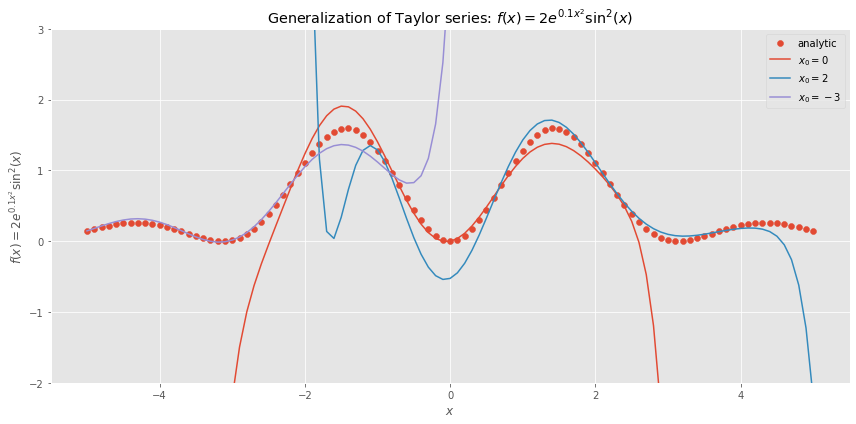

In [68]:
def func(x):
    return 2*np.sin(x)**2 * np.exp(-0.1*x**2)
nmax = 15
h = 0.1

x_list = np.linspace(-5,5,101)

plt.figure(figsize=(12,6))

plt.scatter(x_list, func(x_list), label='analytic');

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), label='$x_{0} = 0$');
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), label='$x_{0} = 2$');
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), label='$x_{0} = -3$');

plt.title('Generalization of Taylor series: $f(x) = 2  e^{0.1x^{2}} \sin^{2}{(x)}$');
plt.xlabel('$x$');
plt.ylabel('$f(x) = 2  e^{0.1x^{2}} \sin^{2}{(x)}$');
plt.ylim([-2, 3]);
plt.tight_layout();
plt.legend();